### Prueba - Análisis estadístico con Python


In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures as polynom
from sklearn.linear_model import LinearRegression as linreg
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

plt.style.use('seaborn-whitegrid')

from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

C:\Users\susan\AppData\Local\Temp\ipykernel_12996\2416799408.py:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from sklearn import linear_model
from funciones_1 import*

In [3]:
#carga información
df = pd.read_csv('cardio.csv')

In [4]:
#Primeros datos de cada variable
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [6]:
# Existen variables de tipo float, int y object. la mayor parte de las variables tienen 4238 filas, las variables que tienen menos
#son : education, cigsPerDay, BPMeds, totChol, BMI, heartRate, glucose

In [7]:
#value count para las variables con menos datos discretas y object, describe para continuas

df['education'].value_counts()

1.0    1720
2.0    1253
3.0     687
4.0     473
Name: education, dtype: int64

In [8]:
df['cigsPerDay'].value_counts()

0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [9]:
df['BPMeds'].value_counts()

0.0    4061
1.0     124
Name: BPMeds, dtype: int64

In [10]:
df['totChol'].describe()

count    4188.000000
mean      236.721585
std        44.590334
min       107.000000
25%       206.000000
50%       234.000000
75%       263.000000
max       696.000000
Name: totChol, dtype: float64

In [11]:
df['BMI'].value_counts()

22.19    18
22.54    18
23.48    18
22.91    18
23.09    16
         ..
34.13     1
23.21     1
29.13     1
19.87     1
43.67     1
Name: BMI, Length: 1363, dtype: int64

In [12]:
df['heartRate'].describe()

count    4237.000000
mean       75.878924
std        12.026596
min        44.000000
25%        68.000000
50%        75.000000
75%        83.000000
max       143.000000
Name: heartRate, dtype: float64

In [13]:
df['glucose'].describe()

count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

In [14]:
#Si bien hay menos datos de 4238, no se ve que que se encuentren otro tipo de datos inválido. 
#lo más probable es que esten como na, para esto se eliminaran estos casos de la base df

df=df.dropna()

In [15]:
df.info() #quedaron 3656 datos al borrar las filas con NA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   object 
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 485.6+ KB


In [16]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,49.557440,1.979759,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,8.561133,1.022657,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


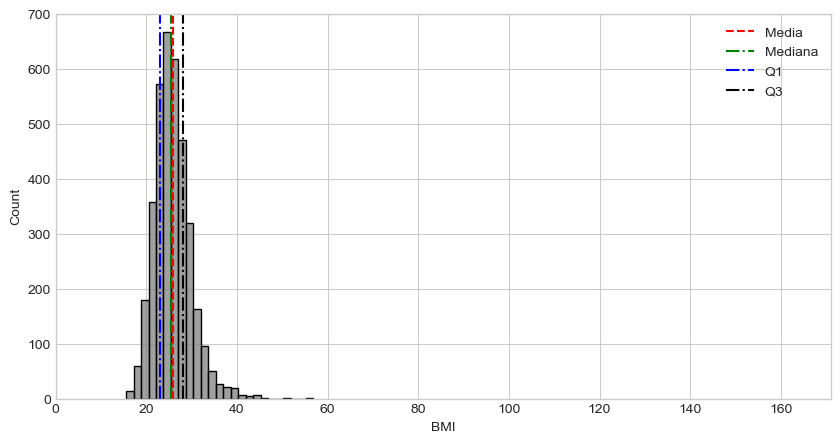

In [17]:
# se elige totChol, BMI y edad 

#Medidas de dispersion: media, mediana, rangos y desviación

fig, axes = plt.subplots(nrows = 1,figsize=(10,5))
seaborn.histplot(df['BMI'],bins=25,color='gray')
plt.xlim(0,171)

axes.axvline(df['BMI'].mean(),color='red', linestyle = '--',label='Media')

axes.axvline(df['BMI'].median(),color='green', linestyle = '-.',label='Mediana')

axes.axvline(df['BMI'].quantile(0.25),color='blue', linestyle = '-.',label='Q1')

axes.axvline(df['BMI'].quantile(0.75),color='black', linestyle = '-.',label='Q3')


axes.legend()




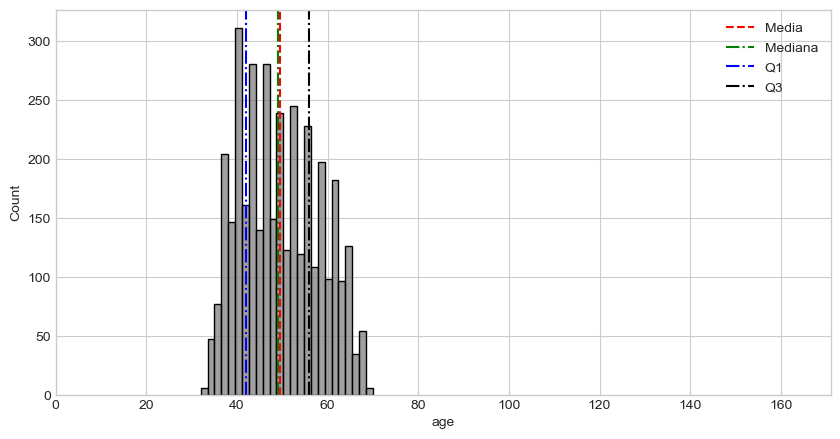

In [18]:
#Medidas de dispersion: media, mediana, rangos y desviación

fig, axes = plt.subplots(nrows = 1,figsize=(10,5))
seaborn.histplot(df['age'],bins=25,color='gray')
plt.xlim(0,171)

axes.axvline(df['age'].mean(),color='red', linestyle = '--',label='Media')

axes.axvline(df['age'].median(),color='green', linestyle = '-.',label='Mediana')

axes.axvline(df['age'].quantile(0.25),color='blue', linestyle = '-.',label='Q1')

axes.axvline(df['age'].quantile(0.75),color='black', linestyle = '-.',label='Q3')


axes.legend()


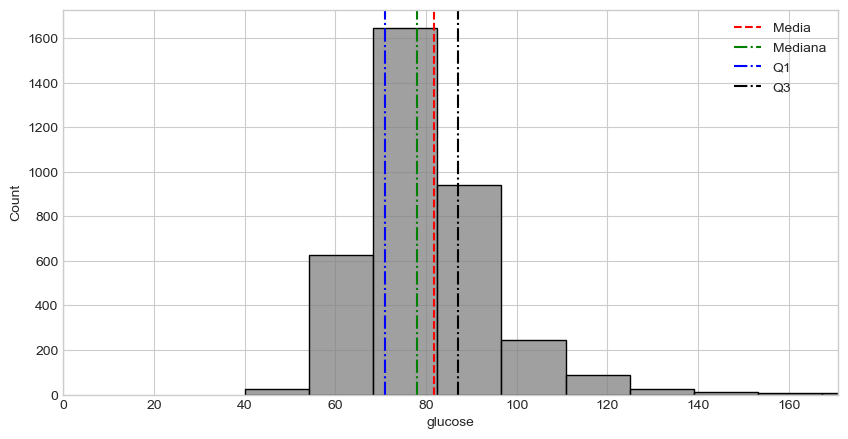

In [19]:
#Medidas de dispersion: media, mediana, rangos y desviación

fig, axes = plt.subplots(nrows = 1,figsize=(10,5))
seaborn.histplot(df['glucose'],bins=25,color='gray')
plt.xlim(0,171)

axes.axvline(df['glucose'].mean(),color='red', linestyle = '--',label='Media')

axes.axvline(df['glucose'].median(),color='green', linestyle = '-.',label='Mediana')

axes.axvline(df['glucose'].quantile(0.25),color='blue', linestyle = '-.',label='Q1')

axes.axvline(df['glucose'].quantile(0.75),color='black', linestyle = '-.',label='Q3')


axes.legend()


In [20]:
#las variables BMI y age tienen media y mediana muy parecidas indicando una distribución simetrica. La media y mediana de glucosa 
#están más separadas en comparación, sin embargo siguen estando en medio de los cuartiles 1 y3.

#En cuanto a dispersión se podría sugerir que glucosa tiene mayor dispersión debido a la distancia entre el dato menor y el dato 
#mayor, en comparación con BMI y age. 

#también se puede ver que BMI tiene algunos outlier.

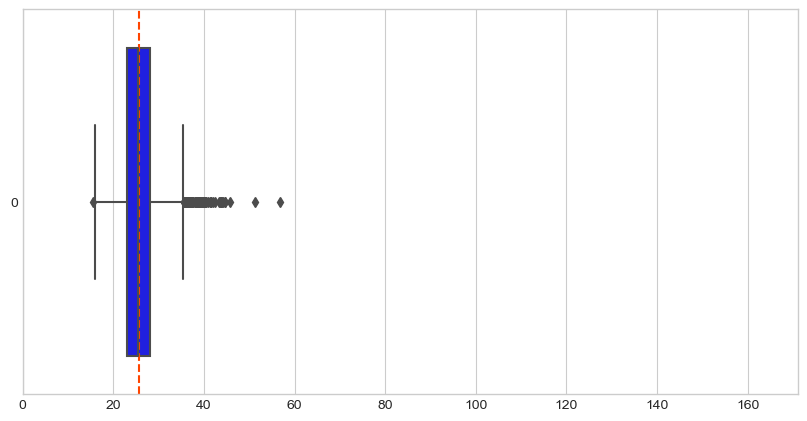

In [21]:
fig, axes = plt.subplots(nrows = 1,figsize=(10,5))
seaborn.boxplot(df['BMI'],color='blue',orient='h')
plt.xlim(0,171)
axes.axvline(df['BMI'].mean(),color='orangered', linestyle = '--',label='Media')

In [22]:
#Estos datos pueden afectar los resultados, ya que tienen gran impacto sobre los resultados de los análisis estadísticos 
#al afectar medidas sensibles a los valores extremos, como la media y la desviación estándar. Además, pueden introducir sesgo 
#en la distribución de los datos, rompiendo las suposiciones de normalidad en las que se basan muchos modelos estadísticos como 
#la regresión lineal o los test de hipótesis. También pueden afectar al rendimiento de los modelos de machine learning.

In [23]:
#Se verificaran las variables cuantitativas (totChol	sysBP	diaBP	BMI	heartRate) para observar outlier

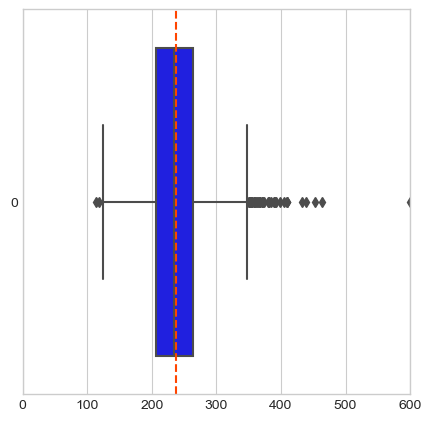

In [24]:
fig, axes = plt.subplots(nrows = 1,figsize=(5,5))
seaborn.boxplot(df['totChol'],color='blue',orient='h')
plt.xlim(0,600)
axes.axvline(df['totChol'].mean(),color='orangered', linestyle = '--',label='Media')

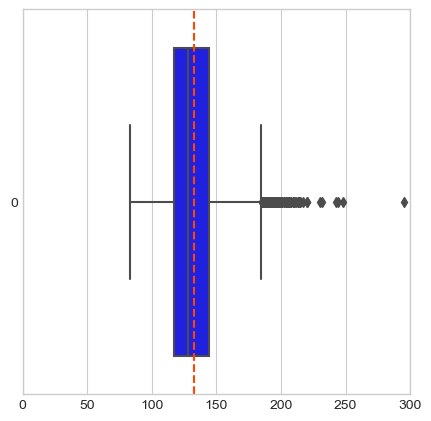

In [25]:
fig, axes = plt.subplots(nrows = 1,figsize=(5,5))
seaborn.boxplot(df['sysBP'],color='blue',orient='h')
plt.xlim(0,300)
axes.axvline(df['sysBP'].mean(),color='orangered', linestyle = '--',label='Media')

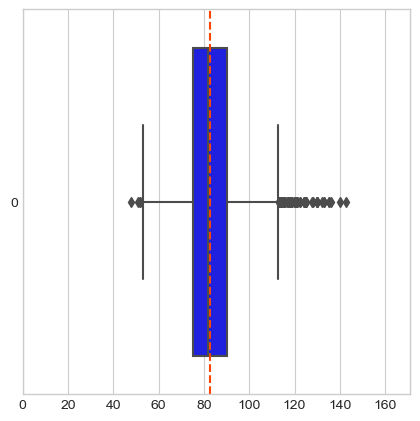

In [26]:
fig, axes = plt.subplots(nrows = 1,figsize=(5,5))
seaborn.boxplot(df['diaBP'],color='blue',orient='h')
plt.xlim(0,171)
axes.axvline(df['diaBP'].mean(),color='orangered', linestyle = '--',label='Media')

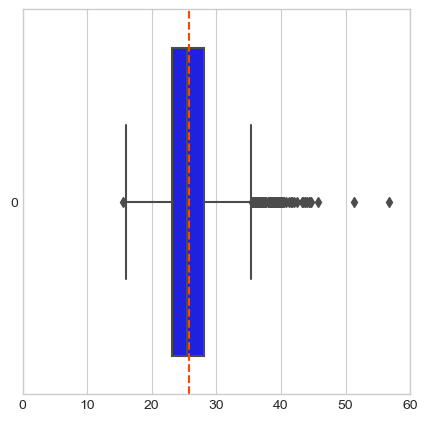

In [27]:
fig, axes = plt.subplots(nrows = 1,figsize=(5,5))
seaborn.boxplot(df['BMI'],color='blue',orient='h')
plt.xlim(0,60)
axes.axvline(df['BMI'].mean(),color='orangered', linestyle = '--',label='Media')

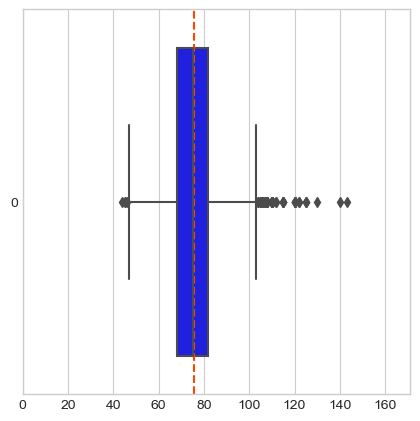

In [28]:
fig, axes = plt.subplots(nrows = 1,figsize=(5,5))
seaborn.boxplot(df['heartRate'],color='blue',orient='h')
plt.xlim(0,171)
axes.axvline(df['heartRate'].mean(),color='orangered', linestyle = '--',label='Media')

In [29]:
#Se observan outlier en todos los casos anteriores. Para eliminar estos casos se calcularán el rango intercuartil
# totChol	sysBP	diaBP	BMI	heartRate

seventy_totChol = df['totChol'].quantile(0.75)
twenty_totChol = df['totChol'].quantile(0.25)

# Obtain IQR
iqr_totChol = seventy_totChol - twenty_totChol

# Upper and lower thresholds
upper_totChol = seventy_totChol + (1.5 * iqr_totChol)
lower_totChol = twenty_totChol - (1.5 * iqr_totChol)
print(upper_totChol,lower_totChol)

349.125 120.125


In [30]:
df = df.drop(df[df['totChol']>=upper_totChol].index)
df = df.drop(df[df['totChol']<=lower_totChol].index)
df['totChol'].describe()

count    3610.000000
mean      235.159834
std        40.926445
min       124.000000
25%       206.000000
50%       233.000000
75%       262.000000
max       347.000000
Name: totChol, dtype: float64

In [31]:
seventy_sysBP = df['sysBP'].quantile(0.75)
twenty_sysBP = df['sysBP'].quantile(0.25)

# Obtain IQR
iqr_sysBP = seventy_sysBP - twenty_sysBP

# Upper and lower thresholds
upper_sysBP = seventy_sysBP + (1.5 * iqr_sysBP)
lower_sysBP = twenty_sysBP - (1.5 * iqr_sysBP)
print(upper_sysBP,lower_sysBP)


df = df.drop(df[df['sysBP']>=upper_sysBP].index)
df = df.drop(df[df['sysBP']<=lower_sysBP].index)
df['sysBP'].describe()

182.9375 77.4375


count    3497.000000
mean      130.035173
std        18.522272
min        83.500000
25%       116.000000
50%       127.500000
75%       141.500000
max       182.500000
Name: sysBP, dtype: float64

In [32]:
seventy_diaBP = df['diaBP'].quantile(0.75)
twenty_diaBP = df['diaBP'].quantile(0.25)

# Obtain IQR
iqr_diaBP = seventy_diaBP - twenty_diaBP

# Upper and lower thresholds
upper_diaBP = seventy_diaBP + (1.5 * iqr_diaBP)
lower_diaBP = twenty_diaBP - (1.5 * iqr_diaBP)
print(upper_diaBP,lower_diaBP)


df = df.drop(df[df['diaBP']>=upper_diaBP].index)
df = df.drop(df[df['diaBP']<=lower_diaBP].index)
df['diaBP'].describe()

111.5 51.5


count    3465.000000
mean       81.769841
std        10.463855
min        52.000000
25%        74.000000
50%        81.000000
75%        88.000000
max       111.000000
Name: diaBP, dtype: float64

In [33]:
seventy_BMI = df['BMI'].quantile(0.75)
twenty_BMI = df['BMI'].quantile(0.25)

# Obtain IQR
iqr_BMI = seventy_BMI - twenty_BMI

# Upper and lower thresholds
upper_BMI = seventy_BMI + (1.5 * iqr_BMI)
lower_BMI = twenty_BMI - (1.5 * iqr_BMI)
print(upper_BMI,lower_BMI)


df = df.drop(df[df['BMI']>=upper_BMI].index)
df = df.drop(df[df['BMI']<=lower_BMI].index)
df['BMI'].describe()

35.23 15.710000000000003


count    3399.000000
mean       25.400853
std         3.489013
min        15.960000
25%        22.925000
50%        25.180000
75%        27.740000
max        35.200000
Name: BMI, dtype: float64

In [34]:
seventy_heartRate = df['heartRate'].quantile(0.75)
twenty_heartRate = df['heartRate'].quantile(0.25)

# Obtain IQR
iqr_heartRate = seventy_heartRate - twenty_heartRate

# Upper and lower thresholds
upper_heartRate = seventy_heartRate + (1.5 * iqr_heartRate)
lower_heartRate = twenty_heartRate - (1.5 * iqr_heartRate)
print(upper_heartRate,lower_heartRate)


df = df.drop(df[df['heartRate']>=upper_heartRate].index)
df = df.drop(df[df['heartRate']<=lower_heartRate].index)
df['heartRate'].describe()

104.5 44.5


count    3339.000000
mean       74.697514
std        10.711234
min        45.000000
25%        67.000000
50%        75.000000
75%        80.000000
max       104.000000
Name: heartRate, dtype: float64

In [35]:
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000,3339.000000
mean,49.159329,2.006888,9.243187,0.020066,0.005391,0.269841,0.022761,234.524109,129.225666,81.526355,25.400773,74.697514,81.169212,0.138065
std,8.475200,1.027897,12.032940,0.140247,0.073235,0.443944,0.149164,40.461740,17.963949,10.378367,3.475324,10.711234,21.947438,0.345020
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,52.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.930000,67.000000,71.000000,0.000000
50%,48.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,81.000000,25.170000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.000000,140.000000,88.000000,27.730000,80.000000,86.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,347.000000,182.500000,111.000000,35.200000,104.000000,394.000000,1.000000


In [36]:
#se seleccionan variables cuantitativas
#totChol	sysBP	diaBP	BMI	heartRate
data=pd.concat ([df['totChol'],df['sysBP'],df['diaBP'],df['BMI'],df['heartRate'],df['cigsPerDay'], df['age']],  axis = 1 )
data

,totChol,sysBP,diaBP,BMI,heartRate,cigsPerDay,age
0,195.0,106.0,70.0,26.97,80.0,0.0,39
1,250.0,121.0,81.0,28.73,95.0,0.0,46
2,245.0,127.5,80.0,25.34,75.0,20.0,48
3,225.0,150.0,95.0,28.58,65.0,30.0,61
4,285.0,130.0,84.0,23.10,85.0,23.0,46
...,...,...,...,...,...,...,...
4231,187.0,141.0,81.0,24.96,80.0,0.0,58
4232,176.0,168.0,97.0,23.14,60.0,0.0,68
4233,313.0,179.0,92.0,25.97,66.0,1.0,50
4234,207.0,126.5,80.0,19.71,65.0,43.0,51


<Axes: >

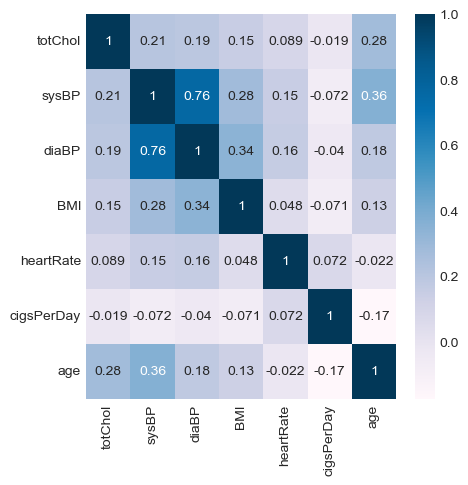

In [37]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.PuBu)

In [38]:
#Diastole y sistole presenta la mayo correlacion por obvias razones. La segunda correlación es la edad y la sistole.
#La tercera es BMI y diastole. En general se puede apreciar que la presión arterial se correlaciona directamente con 
#el IMC (BMI) como con la edad. 

In [39]:
df['BMI'].describe()

count    3339.000000
mean       25.400773
std         3.475324
min        15.960000
25%        22.930000
50%        25.170000
75%        27.730000
max        35.200000
Name: BMI, dtype: float64

In [40]:
#75% mayor cuartil 27.73

df['bmi_75'] = np.where(df['BMI'] >=27.73,1,0)

condicion1 = df['sex'] == 'M' #condición 1: ser hombre
condicion2 = df['bmi_75'] == 1 #condicion 2: mayor cuartil
total=df['sex'].value_counts()['M']+df['sex'].value_counts()['F']
#Probabulidad de ser hombre y estar en el mayor cuartil
p_hombre_75 = (condicion1 & condicion2).sum()/total


In [41]:
#Probabilidad de ser hombre
p_hombre=df['sex'].value_counts()['M']/total
#Probabilidad de que sea mayor a q3
p_q3=df['bmi_75'].value_counts()[1]/total
#print(p_q3)
#Probabilidad de que sea hombre dado de que esta en el mayor q
p_hombre_dado_75 = p_hombre_75/p_q3
print(f'probabilidad de que sea hombre dado que sea mayor a q3 es: {p_hombre_dado_75}')

probabilidad de que sea hombre dado que sea mayor a q3 es: 0.5432977461447213


In [42]:
df = df.drop(columns='bmi_75')

In [43]:
#El promedio de la variable ritmo cardiaco es 75.730580 en este dataset. Este data set corresponde una muestra, de una población
#con ciertas caracteristicas ( no especificadas). 

#Con lo anterior en mente, no se puede afirmar que una persona cualquiera tendrá un promedio de 75. En primer lugar no se sabe
#si las personas de este data fueron seleccionadas respecto a ciertos parámetros específicos, que es lo más probable, debido
#a que se puede ver que ya están en un rango etario. Segundo, si la persona al azar seleccionada pertenece a la población donde
#se extrajo la muestra, tampoco se puede afirmar tal cosa. Para lo que sirve la media muestral es para estimar la media 
#de la población de la que se ha extraído la misma. 

In [44]:
# se binarizan las varariables  categoricas para cumplir con incluir cuantitativas.
df['education'].value_counts()

1.0    1349
2.0    1021
3.0     566
4.0     403
Name: education, dtype: int64

In [45]:
df['education_1']= np.where(df['education'] == 1.0, 1,0 ) 
df['education_2']= np.where(df['education'] == 2.0, 1,0 ) 
df['education_3']= np.where(df['education'] == 3.0, 1,0 ) 

In [46]:
df['currentSmoker'].value_counts()

No     1678
Yes    1661
Name: currentSmoker, dtype: int64

In [47]:
#se binariza currentSmoker
df['si_fuma']= np.where(df['currentSmoker'] == 'Yes', 1,0 ) 

In [48]:
#se binariza variable sex
df['is_male']= np.where(df['sex'] == 'M', 1,0 ) 

In [49]:
#Ahora se crea una base con solo los datos fumadores
fumadores= df.drop(df[df['currentSmoker']== 'No'].index)  # total de fumadores
fumadores



,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1,education_2,education_3,si_fuma,is_male
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,...,80.0,25.34,75.0,70.0,0,1,0,0,1,1
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,...,95.0,28.58,65.0,103.0,1,0,0,1,1,0
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,...,84.0,23.10,85.0,85.0,0,0,0,1,1,0
7,F,45,2.0,Yes,20.0,0.0,0,0,0,313.0,...,71.0,21.68,79.0,78.0,0,0,1,0,1,0
9,M,43,1.0,Yes,30.0,0.0,0,1,0,225.0,...,107.0,23.61,93.0,88.0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,M,47,2.0,Yes,3.0,0.0,0,0,0,198.0,...,80.0,25.23,75.0,76.0,0,0,1,0,1,1
4225,M,45,4.0,Yes,43.0,0.0,0,0,0,216.0,...,85.0,24.24,83.0,105.0,0,0,0,0,1,1
4227,M,43,4.0,Yes,20.0,0.0,0,0,0,187.0,...,88.0,25.62,80.0,75.0,0,0,0,0,1,1
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,...,92.0,25.97,66.0,86.0,1,1,0,0,1,1


In [50]:
#Podemos comparar el promedio de consumo de cigarros  de hombres y mujeres en la base fumadores, donde probablemente exista una diferencia 
#numérica

fumadores_h= fumadores.drop(fumadores[fumadores['is_male']==0].index) 
fumadores_h['cigsPerDay'].describe()



count    927.000000
mean      22.339806
std       10.957899
min        1.000000
25%       18.000000
50%       20.000000
75%       30.000000
max       70.000000
Name: cigsPerDay, dtype: float64

In [51]:
fumadores_f= fumadores.drop(fumadores[fumadores['is_male']==1].index) 
fumadores_f['cigsPerDay'].describe()

count    734.000000
mean      13.833787
std        8.606426
min        1.000000
25%        6.000000
50%       15.000000
75%       20.000000
max       43.000000
Name: cigsPerDay, dtype: float64

In [52]:
#Efectivamente existe una diferencia (22.33 M, 13.83F), pero esto no es suficiente para inferir si la variable sex
#tiene algún efecto en la variable cigsPerDay. Para determinar esto se debe hacer un test de hipótesis. 

In [53]:
def hipotesis(df, variable,  binarize):
    """ Esta es una prueba para la hipótesis nula de que 2 muestras independientes tienen valores promedio (esperados) idénticos.
    Esta prueba asume que las poblaciones tienen varianzas idénticas por defecto.."""
    from scipy.stats import norm, ttest_ind
    #borro na de variable
    df=df.dropna(subset=[variable])
    a=[]
    b=[]
    #separo variable segun binarize
    for i in df.index:
        if df[binarize][i]==1:
            a.append(df[variable][i])
        elif df[binarize][i]==0:
            b.append(df[variable][i])
    a_arr = pd.array(data=a,dtype=float) 
    b_arr = pd.array(data=b,dtype=float) 
#print(a)
#print(b)
   #obtengo valores valor t y pval con  ttest_ind
    val=ttest_ind(a_arr,b_arr)
    #print(val)
    t=val[0]
    pval=val[1]
    print(f"La media de {variable} cuando {binarize} = 1 es:  {np.mean(a_arr)}")
    print(f"La media de {variable} cuando {binarize} = 0 es:  {np.mean(b_arr)}")
    print(f"La diferencia entre medias es {abs(np.mean(a_arr)- np.mean(b_arr))}")
    print(f"T estadistico es =  {t} P valores es =  {pval}")
    print("                                          ")

In [54]:
#La hipótesis nula (H0) sería que no hay diferencia significativa en el número se cigarros cosnumidos entre hombres y mujeres, y
#la hipótesis alternativa (H1) es que sí hay una diferencia significativa


hipotesis(fumadores,'cigsPerDay', 'is_male')

La media de cigsPerDay cuando is_male = 1 es:  22.339805825242717
La media de cigsPerDay cuando is_male = 0 es:  13.833787465940054
La diferencia entre medias es 8.506018359302663
T estadistico es =  17.237528620707558 P valores es =  2.2256700611101493e-61
                                          


In [55]:
#se muestra que el p valor es significante, se rechaza ho, si hay diferencia en el consumo y por lo tanto en el promedio de 
#cigsPerDay

In [56]:
df

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,...,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1,education_2,education_3,si_fuma,is_male
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,...,70.0,26.97,80.0,77.0,0,0,0,0,0,1
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,...,81.0,28.73,95.0,76.0,0,0,1,0,0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,...,80.0,25.34,75.0,70.0,0,1,0,0,1,1
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,...,95.0,28.58,65.0,103.0,1,0,0,1,1,0
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,...,84.0,23.10,85.0,85.0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,M,58,3.0,No,0.0,0.0,0,1,0,187.0,...,81.0,24.96,80.0,81.0,0,0,0,1,0,1
4232,M,68,1.0,No,0.0,0.0,0,1,0,176.0,...,97.0,23.14,60.0,79.0,1,1,0,0,0,1
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,...,92.0,25.97,66.0,86.0,1,1,0,0,1,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,...,80.0,19.71,65.0,68.0,0,0,0,1,1,1


In [57]:
columnas3 = list(df.columns)
columnas3
columnas3.remove('BMI')
columnas3.remove('currentSmoker')
columnas3.remove('education')
columnas3.remove('sex')

sum_var = "+".join(columnas3)
sum_var

'age+cigsPerDay+BPMeds+prevalentStroke+prevalentHyp+diabetes+totChol+sysBP+diaBP+heartRate+glucose+TenYearCHD+education_1+education_2+education_3+si_fuma+is_male'

#### Modelo estadístico 

In [58]:
modelo_1 = smf.ols('BMI ~ '+sum_var, data=df)
modelo_1 = modelo_1.fit()
modelo_1.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.172     
Dependent Variable: BMI              AIC:                17182.6927
Date:               2024-03-06 11:13 BIC:                17292.7344
No. Observations:   3339             Log-Likelihood:     -8573.3   
Df Model:           17               F-statistic:        41.75     
Df Residuals:       3321             Prob (F-statistic): 4.98e-126 
R-squared:          0.176            Scale:              10.002    
-------------------------------------------------------------------
                     Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
-------------------------------------------------------------------
Intercept           16.1249   0.7792 20.6948 0.0000 14.5972 17.6526
age                 -0.0041   0.0077 -0.5388 0.5901 -0.0192  0.0109
cigsPerDay           0.0095   0.0075  1.2636 0.2065 -0.0052  0.0242
BPMeds               0.3719   0.4049  0.9186 0.3583 -0.4219  1.1657
prevalentStroke     -1.0462   0.7529 -1.3895 0.1648 -2.5224  0.4300
prevalentHyp         0.5144   0.1744  2.9499 0.0032  0.1725  0.8563
diabetes             0.2871   0.4542  0.6322 0.5273 -0.6034  1.1777
totChol              0.0074   0.0014  5.1845 0.0000  0.0046  0.0103
sysBP               -0.0024   0.0056 -0.4229 0.6724 -0.0133  0.0086
diaBP                0.0845   0.0085  9.9249 0.0000  0.0678  0.1012
heartRate            0.0047   0.0053  0.8714 0.3836 -0.0058  0.0151
glucose              0.0031   0.0031  1.0075 0.3138 -0.0030  0.0092
TenYearCHD           0.0964   0.1665  0.5787 0.5628 -0.2301  0.4229
education_1          0.9047   0.1824  4.9588 0.0000  0.5470  1.2624
education_2          0.2208   0.1882  1.1736 0.2406 -0.1481  0.5898
education_3          0.1296   0.2085  0.6217 0.5342 -0.2792  0.5385
si_fuma             -1.2331   0.1748 -7.0561 0.0000 -1.5758 -0.8905
is_male              0.9988   0.1218  8.2036 0.0000  0.7601  1.2375
-------------------------------------------------------------------
Omnibus:              51.124        Durbin-Watson:           1.987 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        53.306
Skew:                 0.297         Prob(JB):                0.000 
Kurtosis:             3.176         Condition No.:           4454  
===================================================================
* The condition number is large (4e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [59]:
# El r^2 indica bajo poder explicativo del modelo, se dejan solo las variables que son significativas (p<=0.05)
#Se dejan las 6 variables significativas al modelo


In [60]:
columnas4='prevalentHyp+totChol+diaBP+is_male+education_1+si_fuma'
modelo_1m = smf.ols('BMI ~ '+columnas4, data=df)
modelo_1m = modelo_1m.fit()
modelo_1m.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.172     
Dependent Variable: BMI              AIC:                17171.5698
Date:               2024-03-06 11:13 BIC:                17214.3638
No. Observations:   3339             Log-Likelihood:     -8578.8   
Df Model:           6                F-statistic:        116.5     
Df Residuals:       3332             Prob (F-statistic): 7.08e-134 
R-squared:          0.173            Scale:              10.002    
--------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       16.4957    0.5810  28.3943  0.0000  15.3566  17.6348
prevalentHyp     0.5078    0.1536   3.3059  0.0010   0.2067   0.8090
totChol          0.0074    0.0014   5.3524  0.0000   0.0047   0.0101
diaBP            0.0832    0.0067  12.4573  0.0000   0.0701   0.0962
is_male          1.0241    0.1133   9.0354  0.0000   0.8019   1.2463
education_1      0.7434    0.1121   6.6298  0.0000   0.5235   0.9632
si_fuma         -1.0394    0.1128  -9.2115  0.0000  -1.2607  -0.8182
-------------------------------------------------------------------
Omnibus:              53.972        Durbin-Watson:           1.993 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        56.388
Skew:                 0.306         Prob(JB):                0.000 
Kurtosis:             3.175         Condition No.:           2693  
===================================================================
* The condition number is large (3e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [61]:
#el r^2 no mejora, puede que alguna de las variables  eliminadas aportara realmente al modelo . 
#Todas las variables son significantes

#### Modelo predictivo

In [62]:
#Se borran columnas tipo object ya que estan binarizadas

df = df.drop(columns='sex')
df = df.drop(columns='education')
df = df.drop(columns='currentSmoker')

In [63]:
y= df['BMI']


In [64]:
X = df[columnas3]


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1121)

In [66]:
X_train.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,heartRate,glucose,TenYearCHD,education_1,education_2,education_3,si_fuma,is_male
758,53,9.0,0.0,0,0,0,278.0,131.0,87.0,63.0,74.0,1,1,0,0,1,0
2543,48,0.0,0.0,0,1,0,234.0,144.0,90.0,72.0,70.0,0,1,0,0,0,0
1809,55,0.0,0.0,0,0,0,195.0,135.0,80.0,100.0,75.0,0,0,0,1,0,0
1702,47,3.0,0.0,0,0,0,246.0,120.0,78.0,63.0,75.0,0,0,0,1,1,0
2429,49,9.0,0.0,0,0,0,193.0,115.0,79.0,48.0,88.0,0,0,1,0,1,1


In [67]:
y_train.head()

758     33.38
2543    29.34
1809    32.91
1702    24.71
2429    21.86
Name: BMI, dtype: float64

In [68]:
#Ahora generamos el modelo con intercepto

In [69]:
#Con intercepto
#Instanciamos el modelo
lm_1 = linear_model.LinearRegression(fit_intercept=True)
#Entrenamos
lm_1.fit(X_train, y_train)
#Predecimos en  test
#Prediccion de la matriz de prueba
predictions_test_1 = lm_1.predict(X_test)
#predictions_test_1

In [70]:
def report_scores(prediction_test, vector):
    """Cálculo del error cuadratico medio y R cuadrado para un modelo de regresión lineal """
    #Realizamos métricas 
    mse=mean_squared_error(vector, prediction_test).round(2)
    r2=r2_score(vector, prediction_test).round(2)
    print(f'Error cuadrático medio: ', mse, 'R2: ', r2)

In [71]:
#Modelo con intercepto
report_scores(predictions_test_1, y_test)

Error cuadrático medio:  9.72 R2:  0.17


In [72]:
#Ahora seleccionamos las 6 variables que se nos piden, con correlacion
def fetch_features(df, vector):
        """Correlaciones de variables del dataframe con variable objetivo """
        # nombres de las columnas 
        columnas = df.columns
        # array para nombre de la variable
        attr_name = []
        # array para correlación de pearson
        pearson_r = []
        # array para valor absoluto de la correlación
        abs_pearson_r = []
    
        for c in columnas:
        # si la columna no es la dependiente
            if c != vector:
                # adjuntar el nombre de la variable en attr_name
                attr_name.append(c)
                # adjuntar la correlación de pearson
                pearson_r.append(df[c].corr(df[vector]))
                # adjuntar el absoluto de la correlación de pearson
                abs_pearson_r.append(abs(df[c].corr(df[vector])))
            
        # El arrays se transforma en DataFrame
        features = pd.DataFrame({
        'attribute': attr_name,
        'corr':pearson_r,
        'abs_corr':abs_pearson_r
        })
        # Se crea el index con los nombres de las variables
        features = features.set_index('attribute')
        # ordenamos los valores de forma descendiente
        features=features.sort_values(by=['abs_corr'], ascending=False)
        return features

In [73]:
df

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_1,education_2,education_3,si_fuma,is_male
0,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,0,0,0,1
1,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,0,1,0,0,0
2,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,0,0,1,1
3,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,0,0,1,1,0
4,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,58,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0,0,0,1,0,1
4232,68,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1,1,0,0,0,1
4233,50,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1,1,0,0,1,1
4234,51,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0,0,0,1,1,1


In [74]:
#Las 6 mayores correlaciones son:
correc=fetch_features(df, 'BMI')
correc.head(6)

,corr,abs_corr
attribute,,
diaBP,0.339523,0.339523
sysBP,0.280439,0.280439
prevalentHyp,0.250710,0.250710
si_fuma,-0.161546,0.161546
totChol,0.147884,0.147884
is_male,0.145086,0.145086


In [75]:
#similar a las variables del al caso de la seleccion anterior con el modelo estadistico.
var=['diaBP', 'sysBP', 'prevalentHyp','si_fuma','totChol','is_male']
var
var_3=df.loc[:,var]
var_3



,diaBP,sysBP,prevalentHyp,si_fuma,totChol,is_male
0,70.0,106.0,0,0,195.0,1
1,81.0,121.0,0,0,250.0,0
2,80.0,127.5,0,1,245.0,1
3,95.0,150.0,1,1,225.0,0
4,84.0,130.0,0,1,285.0,0
...,...,...,...,...,...,...
4231,81.0,141.0,1,0,187.0,1
4232,97.0,168.0,1,0,176.0,1
4233,92.0,179.0,1,1,313.0,1
4234,80.0,126.5,0,1,207.0,1


In [76]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(var_3, y, test_size=0.33, random_state=1121)

In [77]:
#Con intercepto
#Instanciamos el modelo
lm_3 = linear_model.LinearRegression(fit_intercept=True)
#Entrenamos
lm_3.fit(X_train2, y_train2)
#Predecimos en  test
#Prediccion de la matriz de prueba
predictions_test_3 = lm_3.predict(X_test2)

In [78]:
report_scores(predictions_test_3, y_test2)

Error cuadrático medio:  9.86 R2:  0.16


In [79]:
#para este modelo con 6 variables, aumenta levemente el error cuadrático y disminuye levemente el r^2
#ambos modelos son similares

In [80]:
#TenYearCHD variable de interés

In [81]:
columnas5 = list(df.columns)
columnas5
columnas5.remove('TenYearCHD')


sum_var = "+".join(columnas5)
sum_var

'age+cigsPerDay+BPMeds+prevalentStroke+prevalentHyp+diabetes+totChol+sysBP+diaBP+BMI+heartRate+glucose+education_1+education_2+education_3+si_fuma+is_male'

#### Modelo estadístico

In [82]:
m1_logit = smf.logit('TenYearCHD ~ '+sum_var, df).fit()

Optimization terminated successfully.
         Current function value: 0.355871
         Iterations 7


In [83]:
m1_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.114     
Dependent Variable: TenYearCHD       AIC:              2412.5085 
Date:               2024-03-06 11:13 BIC:              2522.5502 
No. Observations:   3339             Log-Likelihood:   -1188.3   
Df Model:           17               LL-Null:          -1340.4   
Df Residuals:       3321             LLR p-value:      1.4720e-54
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -8.2033   0.8547 -9.5974 0.0000 -9.8785 -6.5280
age                0.0657   0.0073  9.0608 0.0000  0.0515  0.0799
cigsPerDay         0.0181   0.0066  2.7548 0.0059  0.0052  0.0310
BPMeds             0.0487   0.3141  0.1551 0.8768 -0.5668  0.6643
prevalentStroke    1.1809   0.5263  2.2436 0.0249  0.1493  2.2126
prevalentHyp       0.2236   0.1563  1.4307 0.1525 -0.0827  0.5299
diabetes           0.2883   0.3507  0.8222 0.4110 -0.3990  0.9757
totChol            0.0018   0.0014  1.2999 0.1936 -0.0009  0.0045
sysBP              0.0194   0.0050  3.8629 0.0001  0.0095  0.0292
diaBP             -0.0149   0.0078 -1.9037 0.0569 -0.0303  0.0004
BMI                0.0153   0.0166  0.9210 0.3571 -0.0172  0.0478
heartRate         -0.0020   0.0052 -0.3941 0.6935 -0.0121  0.0081
glucose            0.0057   0.0025  2.3067 0.0211  0.0009  0.0106
education_1       -0.0172   0.1721 -0.1001 0.9203 -0.3545  0.3201
education_2       -0.1876   0.1863 -1.0066 0.3141 -0.5528  0.1776
education_3       -0.2031   0.2090 -0.9721 0.3310 -0.6127  0.2064
si_fuma            0.0950   0.1692  0.5617 0.5743 -0.2366  0.4267
is_male            0.5675   0.1196  4.7468 0.0000  0.3332  0.8018
=================================================================

"""

In [84]:
#se sacan las variables no significativas (p<=0.05)

In [85]:
columnas6='age+cigsPerDay+prevalentStroke+sysBP+glucose+is_male'
m1_logit2 = smf.logit('TenYearCHD ~ '+columnas6, df).fit()

Optimization terminated successfully.
         Current function value: 0.357572
         Iterations 7


In [86]:
m1_logit2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.109     
Dependent Variable: TenYearCHD       AIC:              2401.8650 
Date:               2024-03-06 11:13 BIC:              2444.6590 
No. Observations:   3339             Log-Likelihood:   -1193.9   
Df Model:           6                LL-Null:          -1340.4   
Df Residuals:       3332             LLR p-value:      2.6843e-60
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -8.9761   0.5019 -17.8829 0.0000 -9.9599 -7.9923
age               0.0717   0.0069  10.4460 0.0000  0.0582  0.0851
cigsPerDay        0.0204   0.0044   4.6231 0.0000  0.0117  0.0290
prevalentStroke   1.1421   0.5146   2.2196 0.0264  0.1336  2.1507
sysBP             0.0179   0.0030   6.0672 0.0000  0.0121  0.0237
glucose           0.0071   0.0019   3.7542 0.0002  0.0034  0.0108
is_male           0.5717   0.1142   5.0044 0.0000  0.3478  0.7957
=================================================================

"""

In [87]:
# El Pseudo R^2 de ambos modelos son muy similares, pero el último disminuyó  (explican la varianza del modelo en aproximadamente 
#un 10%)
#Todas las variables del modelo depurado siguen siendo significativas

#### Modelo predictivo

In [88]:

X=df.drop(columns=['TenYearCHD'])

In [89]:
y = df['TenYearCHD']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1121)

In [91]:
# estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)

# estandarizamos la matriz de pruebas ( se usa para generar la prediccion de las clases)
X_test_std = StandardScaler().fit_transform(X_test)


In [92]:
default_model = LogisticRegression(random_state=1511).fit(X_train_std, y_train)

In [93]:
#predicción de las clases
yhat = default_model.predict(X_test_std)

In [94]:
#predicción de probabilidad.
yhat_prob = default_model.predict_proba(X_test_std)

In [95]:
#exactitud de nuestro modelo
m1_acc = accuracy_score(y_test, yhat)
round(m1_acc,2)


0.88

In [96]:
#La exactitud informa que el modelo tiene un desempeño de un 0.38% superior que una predicción azarosa.

In [97]:
#Reporte las métricas de precisión, recall y f1 para ambas clases.
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94       967
           1       0.62      0.07      0.13       135

    accuracy                           0.88      1102
   macro avg       0.75      0.53      0.53      1102
weighted avg       0.85      0.88      0.84      1102



In [98]:
#Se observa que F1 tiene una media armónica para la clase 1 de 0.13 y para la clase 0 de 0.94.
#El recall para la clase 1 es muy bajo con 0.07, el modelo no es optimo para determinar valores positivos correctamente
#clasificados

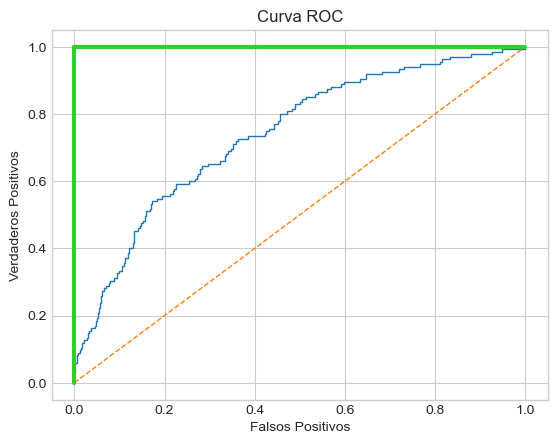

In [99]:
#Curva Roc

# reestimamos los valores predichos de nuestro modelo para obtener la probabilidad entre 0 y 1.
yhat2 = default_model.predict_proba(X_test_std)[:, 1]

# generamos los objetos de roc_curve
false_positive, true_positive, threshold = roc_curve(y_test, yhat2)
# Plot ROC curve
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

In [100]:
#área bajo la curva
round(roc_auc_score(y_test, yhat2),2)

0.74

In [101]:
#Se observa que la curva ROC tiene una capacidad predictiva adecuada, ya que se posiciona por sobre la
#bisectriz, lo que significa que la tasa de verdaderos positivos es mayor que la tasa de falsos
#positivos. Además tiende a acercarse a la esquina superior izquierda del gráfico.

#EL área bajo la curva tiene un valor de .74, esto significa que el modelo tiene un desempeño de 24% superior a un mecanismo
#de clasificación aleatoria.

#El modelo es adecuado

In [102]:
#Desbalanceo

# Es necesario escalar
sc=StandardScaler()

# Identifiquemos las variables X e y
X_d=df.drop('TenYearCHD', axis = 1)
y_d=df['TenYearCHD']
X_d=sc.fit_transform(X)
print(df['TenYearCHD'].value_counts())

0    2878
1     461
Name: TenYearCHD, dtype: int64


In [103]:
#Existe diferencia entre ambas clases de la variable a predecir, se aplica smote

In [104]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, average_precision_score

X_s = df.drop(columns=["TenYearCHD"]).values

# Variable dependiente
y_s = df["TenYearCHD"].values

# Estandarizar las características
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# Modelo de Regresión Logística sin SMOTE
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_s, y_s)

# Realizar predicciones en el conjunto de datos sin SMOTE
y_pred = logistic_regression_model.predict(X_s)

# Calcular AUC-ROC sin SMOTE
roc_auc = roc_auc_score(y_s, y_pred)

# Calcular AUC-PR sin SMOTE
average_precision = average_precision_score(y_s, y_pred)

# Ahora, aplicaremos SMOTE y crearemos el modelo nuevamente
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_s, y_s)

# Modelo de Regresión Logística con SMOTE
logistic_regression_model_smote = LogisticRegression(random_state=42)
logistic_regression_model_smote.fit(X_resampled, y_resampled)

# Realizar predicciones en el conjunto de datos con SMOTE
y_pred_smote = logistic_regression_model_smote.predict(X_s)

# Calcular AUC-ROC con SMOTE
roc_auc_smote = roc_auc_score(y_s, y_pred_smote)

# Calcular AUC-PR con SMOTE
average_precision_smote = average_precision_score(y_s, y_pred_smote)

# Imprimir AUC-ROC y AUC-PR para ambos modelos
print("AUC-ROC sin SMOTE:", roc_auc)
print("AUC-PR sin SMOTE:", average_precision)
print("AUC-ROC con SMOTE:", roc_auc_smote)
print("AUC-PR con SMOTE:", average_precision_smote)

AUC-ROC sin SMOTE: 0.5313640467967783
AUC-PR sin SMOTE: 0.17615831532460682
AUC-ROC con SMOTE: 0.6825898166809622
AUC-PR con SMOTE: 0.21737320232037563


In [105]:
#AUC-ROC y AUC-PR aumentaron con smote

In [106]:
#Se considerarán el modelo predictivo de regresión lineal. Se separá por generoy se considera BMI como var a predecir
#'diaBP', 'sysBP', 'prevalentHyp','si_fuma','totChol' como regresoras

In [107]:
#Regresion lineal predictiva
import statsmodels.api as sm

# Filtrar los datos por género
paciente_hombre = df[df['is_male'] == 1]
paciente_mujer = df[df['is_male'] == 0]

# Crear modelos de regresión lineal para cada género y para ambos juntos
model_hombre = sm.OLS(paciente_hombre['BMI'], sm.add_constant(paciente_hombre[['diaBP', 'sysBP', 'prevalentHyp','si_fuma','totChol','is_male']])).fit()
model_mujer = sm.OLS(paciente_mujer['BMI'], sm.add_constant(paciente_mujer[['diaBP', 'sysBP', 'prevalentHyp','si_fuma','totChol','is_male']])).fit()
model_ambos = sm.OLS(df['BMI'], sm.add_constant(df[['diaBP', 'sysBP', 'prevalentHyp','si_fuma','totChol','is_male']])).fit()


In [108]:
# Obtener las predicciones de cada modelo
predictions_h = model_hombre.predict()
predictions_m = model_mujer.predict()
predictions_ambos = model_ambos.predict()

# Calcular el Error Cuadrático Medio (MSE) para cada modelo
mse_h = ((paciente_hombre['BMI'] - predictions_h) ** 2).mean()
mse_m = ((paciente_mujer ['BMI'] - predictions_m) ** 2).mean()
mse_ambos = ((df['BMI'] - predictions_ambos) ** 2).mean()


In [109]:

# Calcular el Error Cuadrático Medio Explicado (EMSE) para cada modelo
emse_h = mse_h / ((paciente_hombre['BMI'] - paciente_hombre['BMI'].mean()) ** 2).mean()
emse_m = mse_m / ((paciente_mujer['BMI'] - paciente_mujer['BMI'].mean()) ** 2).mean()
emse_ambos = mse_ambos / ((df['BMI'] - df['BMI'].mean()) ** 2).mean()

# Calcular el Coeficiente de Determinación (R²) para cada modelo
r2_h = model_hombre.rsquared
r2_m = model_mujer.rsquared
r2_ambos = model_ambos.rsquared

# Calcular el Error Absoluto Medio (MAE) para cada modelo
mae_h = (abs(paciente_hombre['BMI'] - predictions_h)).mean()
mae_m = (abs(paciente_mujer['BMI'] - predictions_m)).mean()
mae_ambos = (abs(df['BMI'] - predictions_ambos)).mean()


In [110]:
# Mostrar los resultados
print("Modelo paciente masculino:")
print(f"R²: {r2_h:.2f}, MSE: {mse_h:.2f}, EMSE: {emse_h:.2f}, MAE: {mae_h:.2f}")

print("\nModelo para paciente femenino:")
print(f"R²: {r2_m:.2f}, MSE: {mse_m:.2f}, EMSE: {emse_m:.2f}, MAE: {mae_m:.2f}")

print("\nModelo para ambos géneros juntos:")
print(f"R²: {r2_ambos:.2f}, MSE: {mse_ambos:.2f}, EMSE: {emse_ambos:.2f}, MAE: {mae_ambos:.2f}")

Modelo paciente masculino:
R²: 0.13, MSE: 8.70, EMSE: 0.87, MAE: 2.35

Modelo para paciente femenino:
R²: 0.16, MSE: 11.24, EMSE: 0.84, MAE: 2.66

Modelo para ambos géneros juntos:
R²: 0.16, MSE: 10.11, EMSE: 0.84, MAE: 2.53


In [111]:
# El error cuadrático medio y abosluto son mayores en el modelo obtenido para pacientes mujeres, mientras que
# R^2 es también es mayor en este modelo. En concreto el modelo para pacientes masculinos tiene menor explicabilidad de 
# BMI pero menor error, mientras que el modelo para pacientes femeninas tienen mayor explicabilidad de BMI pero mayor error.

#Observando el modelo con ambos generos se puede entender que: Mejora la explicabilidad que se reduce al considerar solo
#hombres, mientras que reduce el error que se da si se consideran solo mujeres. 

